   Jahr  Mietindex
0  2015   93.71250
1  2016   94.70000
2  2017   95.88750
3  2018   97.13750
4  2019   98.46250
5  2020  100.00000
6  2021  101.26250
7  2022  102.70000
8  2023  104.47500
9  2024  106.56875


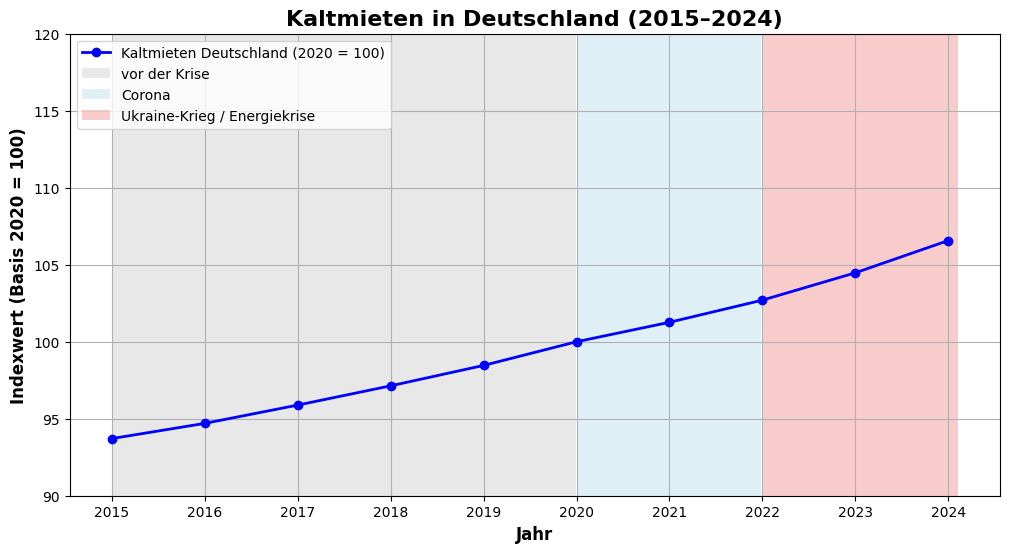

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [108]:
# 📊 Bibliotheken laden
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# 📁 CSV-Datei hochladen (Kaltmieten)
uploaded = files.upload()

# 📥 CSV-Datei einlesen
miete = pd.read_csv('Kaltmieten61111-0020.csv', delimiter=';', encoding='utf-8')

# 🔍 Nur wichtige Spalten auswählen: Jahr, Ortsgröße, Indexwert
miete_clean = miete[['time', '1_variable_attribute_label', 'value']]

# ❌ Ungültige Werte ("-") entfernen
miete_clean = miete_clean[miete_clean['value'] != '-']

# 🔄 Komma durch Punkt ersetzen (z. B. 103,5 → 103.5)
miete_clean['value'] = miete_clean['value'].str.replace(',', '.', regex=False)
miete_clean['value'] = miete_clean['value'].astype(float)

# 📆 Zeitraum von 2015 bis 2024 auswählen
miete_clean = miete_clean[(miete_clean['time'] >= 2015) & (miete_clean['time'] <= 2024)]

# 🧮 Durchschnittlicher Mietindex pro Jahr berechnen
miete_yearly = miete_clean.groupby('time')['value'].mean().reset_index()
miete_yearly.columns = ['Jahr', 'Mietindex']

# 📃 Tabelle anzeigen
print(miete_yearly)

# 📈 Diagramm erstellen
plt.figure(figsize=(12,6))
plt.plot(miete_yearly['Jahr'], miete_yearly['Mietindex'], marker='o', color='blue', linewidth=2, label='Kaltmieten Deutschland (2020 = 100)')

# 🎨 Zeitphasen farbig markieren
plt.axvspan(2015, 2019.99, facecolor='lightgrey', alpha=0.5, label='vor der Krise')
plt.axvspan(2020, 2021.99, facecolor='lightblue', alpha=0.4, label='Corona')
plt.axvspan(2022, 2024.1, facecolor='lightcoral', alpha=0.4, label='Ukraine-Krieg / Energiekrise')

# 🔠 Achsen & Beschriftung
plt.title('Kaltmieten in Deutschland (2015–2024)', fontsize=16, weight='bold')
plt.xlabel('Jahr', fontsize=12, weight='bold')
plt.ylabel('Indexwert (Basis 2020 = 100)', fontsize=12, weight='bold')
plt.ylim(90, 120)
plt.xticks(miete_yearly['Jahr'])
plt.grid(True)
plt.legend()

# 💾 Bild speichern & als CSV exportieren
plt.savefig('Kaltmieten.png', dpi=300)
plt.show()
miete_yearly.to_csv("Kaltmieten.csv", index=False)

# 📥 Dateien herunterladen
files.download('Kaltmieten.png')
files.download('Kaltmieten.csv')


,Jahr,Halbjahr,Strompreis
0,2015,1. HJ,0.2480
1,2015,2. HJ,0.2476
2,2016,1. HJ,0.2495
3,2016,2. HJ,0.2502
4,2017,1. HJ,0.2561
5,2017,2. HJ,0.2561
6,2018,1. HJ,0.2510
7,2018,2. HJ,0.2521
8,2019,1. HJ,0.2595
9,2019,2. HJ,0.2418


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

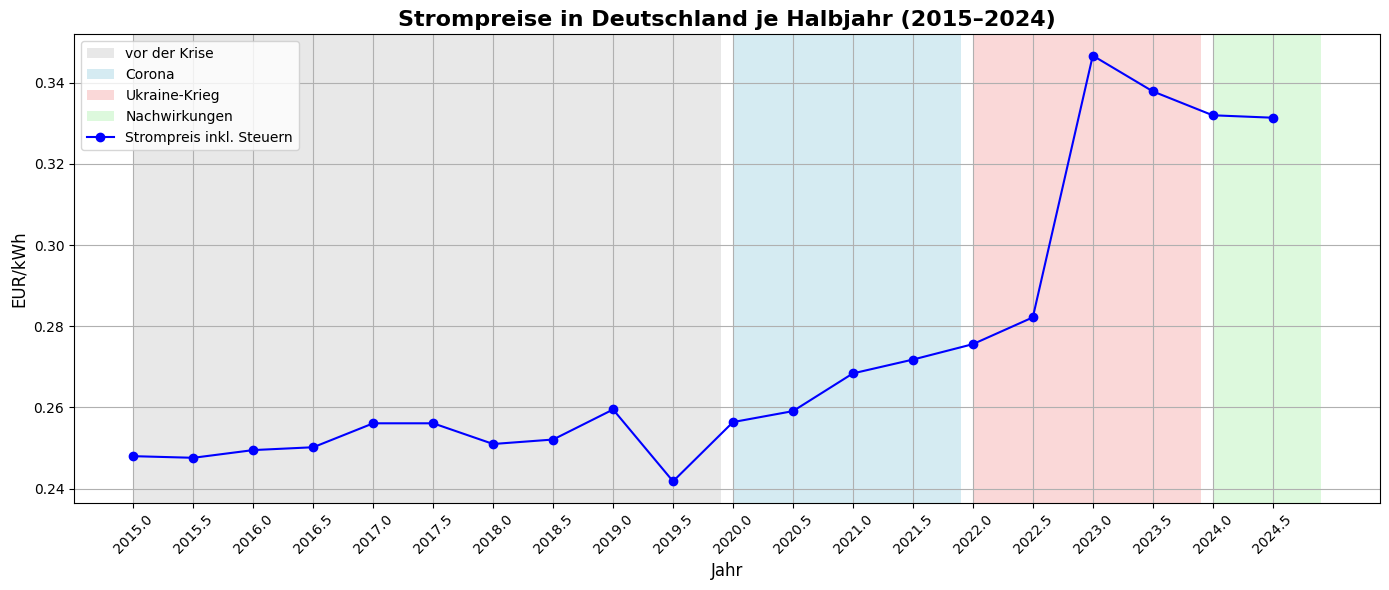

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# 📁 Stromdaten-Datei hochladen
uploaded = files.upload()
filename = 'Strom von2008.csv'

# 📥 Datei einlesen, nur Spalten "Zeitraum" und Strompreis für 2.500–5.000 kWh
strom_raw = pd.read_csv(filename, delimiter=';', header=None)
strom = strom_raw[[0, 8]]  # Spalte 0 = Zeitraum, Spalte 8 = Strompreis brutto
strom.columns = ['Zeitraum', 'Strompreis']

# 🔍 Nur gültige Werte behalten (z. B. „1. HJ 2015“ und Zahlen)
strom = strom[strom['Zeitraum'].str.contains(r'HJ', na=False)]
strom = strom[strom['Strompreis'].str.contains(r'\d', na=False)]

# 🔄 Komma durch Punkt ersetzen und als float konvertieren
strom['Strompreis'] = strom['Strompreis'].str.replace(',', '.').astype(float)

# 🗓️ Jahr & Halbjahr extrahieren
strom['Jahr'] = strom['Zeitraum'].str.extract(r'(\d{4})').astype(int)
strom['Halbjahr'] = strom['Zeitraum'].str.extract(r'(\d)\. HJ').astype(int)
strom = strom[(strom['Jahr'] >= 2015) & (strom['Jahr'] <= 2024)]
strom['Halbjahr'] = strom['Halbjahr'].astype(str) + '. HJ'

# 🧾 Endtabelle erstellen
strom_final = strom[['Jahr', 'Halbjahr', 'Strompreis']].reset_index(drop=True)
display(strom_final)

# 💾 CSV speichern
strom_final.to_csv('Strompreise_Halbjahre_getrennt.csv', index=False)
files.download('Strompreise_Halbjahre_getrennt.csv')

# 📈 Diagramm vorbereiten
strom['x'] = strom['Jahr'] + (strom['Halbjahr'].str[0].astype(int) - 1) * 0.5
plt.figure(figsize=(14,6))

# 🎨 Zeitphasen einfärben
plt.axvspan(2015, 2019.9, facecolor='lightgray', alpha=0.5, label='vor der Krise')
plt.axvspan(2020, 2021.9, facecolor='lightblue', alpha=0.5, label='Corona')
plt.axvspan(2022, 2023.9, facecolor='lightcoral', alpha=0.3, label='Ukraine-Krieg')
plt.axvspan(2024, 2024.9, facecolor='lightgreen', alpha=0.3, label='Nachwirkungen')

# 📊 Strompreis-Linie zeichnen
plt.plot(strom['x'], strom['Strompreis'], marker='o', linestyle='-', color='blue', label='Strompreis inkl. Steuern')
plt.title('Strompreise in Deutschland je Halbjahr (2015–2024)', fontsize=16, fontweight='bold')
plt.xlabel('Jahr', fontsize=12)
plt.ylabel('EUR/kWh', fontsize=12)
plt.xticks(np.arange(2015, 2025, 0.5), rotation=45)
plt.grid(True)
plt.legend(loc='upper left')
plt.tight_layout()

# 💾 Diagramm speichern
plt.savefig('Strompreise_2015_2024_Halbjahre.png', dpi=300, bbox_inches='tight')
files.download('Strompreise_2015_2024_Halbjahre.png')
plt.show()
